In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

import re

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('Existing_Buildings_Energy_Performance_Ordinance_Report.csv')

In [65]:
df.columns

Index(['Parcel(s)', 'Building Name', 'Building Address', 'Postal Code',
       'Full.Address', 'Floor Area', 'Property Type',
       'Property Type - Self Selected', 'PIM Link', 'Year Built',
       ...
       '2012 Weather Normalized Source EUI (kBtu/ft2)',
       '2011 ENERGY STAR Score', '2011 Site EUI (kBtu/ft2)',
       '2011 Source EUI (kBtu/ft2)',
       '2011 Percent Better than National Median Site EUI',
       '2011 Percent Better than National Median Source EUI',
       '2011 Total GHG Emissions (Metric Tons CO2e)',
       '2011 Total GHG Emissions Intensity (kgCO2e/ft2)',
       '2011 Weather Normalized Site EUI (kBtu/ft2)',
       '2011 Weather Normalized Source EUI (kBtu/ft2)'],
      dtype='object', length=113)

# Explore the raw data

In [5]:
[x for x in df.columns]

['Parcel(s)',
 'Building Name',
 'Building Address',
 'Postal Code',
 'Full.Address',
 'Floor Area',
 'Property Type',
 'Property Type - Self Selected',
 'PIM Link',
 'Year Built',
 'Energy Audit Due Date',
 'Energy Audit Status',
 'Benchmark 2019 Status',
 '2019 Reason for Exemption',
 'Benchmark 2018 Status',
 '2018 Reason for Exemption',
 'Benchmark 2017 Status',
 '2017 Reason for Exemption',
 'Benchmark 2016 Status',
 '2016 Reason for Exemption',
 'Benchmark 2015 Status',
 '2015 Reason for Exemption',
 'Benchmark 2014 Status',
 '2014 Reason for Exemption',
 'Benchmark 2013 Status',
 '2013 Reason for Exemption',
 'Benchmark 2012 Status',
 '2012 Reason for Exemption',
 'Benchmark 2011 Status',
 '2011 Reason for Exemption',
 'Benchmark 2010 Status',
 '2010 Reason for Exemption',
 '2019 ENERGY STAR Score',
 '2019 Site EUI (kBtu/ft2)',
 '2019 Source EUI (kBtu/ft2)',
 '2019 Percent Better than National Median Site EUI',
 '2019 Percentage Better than National Median Source EUI',
 '2019 To

In [6]:
df.sample()

,Parcel(s),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type,Property Type - Self Selected,PIM Link,Year Built,Energy Audit Due Date,Energy Audit Status,Benchmark 2019 Status,2019 Reason for Exemption,Benchmark 2018 Status,2018 Reason for Exemption,Benchmark 2017 Status,2017 Reason for Exemption,Benchmark 2016 Status,2016 Reason for Exemption,Benchmark 2015 Status,2015 Reason for Exemption,Benchmark 2014 Status,2014 Reason for Exemption,Benchmark 2013 Status,2013 Reason for Exemption,Benchmark 2012 Status,2012 Reason for Exemption,Benchmark 2011 Status,2011 Reason for Exemption,Benchmark 2010 Status,2010 Reason for Exemption,2019 ENERGY STAR Score,2019 Site EUI (kBtu/ft2),2019 Source EUI (kBtu/ft2),2019 Percent Better than National Median Site EUI,2019 Percentage Better than National Median Source EUI,2019 Total GHG Emissions (Metric Tons CO2e),2019 Total GHG Emissions Intensity (kgCO2e/ft2),2019 Weather Normalized Site EUI (kBtu/ft2),2019 Weather Normalized Source EUI (kBtu/ft2),2018 ENERGY STAR Score,2018 Site EUI (kBtu/ft2),2018 Source EUI (kBtu/ft2),2018 Percent Better than National Median Site EUI,2018 Percent Better than National Median Source EUI,2018 Total GHG Emissions (Metric Tons CO2e),2018 Total GHG Emissions Intensity (kgCO2e/ft2),2018 Weather Normalized Site EUI (kBtu/ft2),2018 Weather Normalized Source EUI (kBtu/ft2),2017 ENERGY STAR Score,2017 Site EUI (kBtu/ft2),2017 Source EUI (kBtu/ft2),2017 Percent Better than National Median Site EUI,2017 Percent Better than National Median Source EUI,2017 Total GHG Emissions (Metric Tons CO2e),2017 Total GHG Emissions Intensity (kgCO2e/ft2),2017 Weather Normalized Site EUI (kBtu/ft2),2017 Weather Normalized Source EUI (kBtu/ft2),2016 ENERGY STAR Score,2016 Site EUI (kBtu/ft2),2016 Source EUI (kBtu/ft2),2016 Percent Better than National Median Site EUI,2016 Percent Better than National Median Source EUI,2016 Total GHG Emissions (Metric Tons CO2e),2016 Total GHG Emissions Intensity (kgCO2e/ft2),2016 Weather Normalized Site EUI (kBtu/ft2),2016 Weather Normalized Source EUI (kBtu/ft2),2015 ENERGY STAR Score,2015 Site EUI (kBtu/ft2),2015 Source EUI (kBtu/ft2),2015 Percent Better than National Median Site EUI,2015 Percent Better than National Median Source EUI,2015 Total GHG Emissions (Metric Tons CO2e),2015 Total GHG Emissions Intensity (kgCO2e/ft2),2015 Weather Normalized Site EUI (kBtu/ft2),2015 Weather Normalized Source EUI (kBtu/ft2),2014 ENERGY STAR Score,2014 Site EUI (kBtu/ft2),2014 Source EUI (kBtu/ft2),2014 Percent Better than National Median Site EUI,2014 Percent Better than National Median Source EUI,2014 Total GHG Emissions (Metric Tons CO2e),2014 Total GHG Emissions Intensity (kgCO2e/ft2),2014 Weather Normalized Site EUI (kBtu/ft2),2014 Weather Normalized Source EUI (kBtu/ft2),2013 ENERGY STAR Score,2013 Site EUI (kBtu/ft2),2013 Source EUI (kBtu/ft2),2013 Percent Better than National Median Site EUI,2013 Percent Better than National Median Source EUI,2013 Total GHG Emissions (Metric Tons CO2e),2013 Total GHG Emissions Intensity (kgCO2e/ft2),2013 Weather Normalized Site EUI (kBtu/ft2),2013 Weather Normalized Source EUI (kBtu/ft2),2012 ENERGY STAR Score,2012 Site EUI (kBtu/ft2),2012 Source EUI (kBtu/ft2),2012 Percent Better than National Median Site EUI,2012 Percent Better than National Median Source EUI,2012 Total GHG Emissions (Metric Tons CO2e),2012 Total GHG Emissions Intensity (kgCO2e/ft2),2012 Weather Normalized Site EUI (kBtu/ft2),2012 Weather Normalized Source EUI (kBtu/ft2),2011 ENERGY STAR Score,2011 Site EUI (kBtu/ft2),2011 Source EUI (kBtu/ft2),2011 Percent Better than National Median Site EUI,2011 Percent Better than National Median Source EUI,2011 Total GHG Emissions (Metric Tons CO2e),2011 Total GHG Emissions Intensity (kgCO2e/ft2),2011 Weather Normalized Site EUI (kBtu/ft2),2011 Weather Normalized Source EUI (kBtu/ft2)
1013,4700/031,900 EARL ST,900 EARL ST,94124,"900 EARL ST\nSAN FRANCISCO, CA 94124\n(37.7290...",89761,

In [7]:
df.shape

(2629, 113)

# Retabulate data to building-year level

In [3]:
# Unstack the data just the year-based data columns
temp = df.set_index('Parcel(s)')
temp2 = pd.DataFrame(pd.DataFrame(temp[[x for x in df.columns if '201' in x]].unstack()).to_records())

In [15]:
# Extract the years and make them their own column
year_starts = [x.find('201') for x in temp2.level_0.values]

years = []
for year_start, value in zip(year_starts, temp2.level_0.values):
    years.append(value[year_start:year_start+4])
    
temp2['year'] = years

In [60]:
# take out the mention of years to normalize the values of the columns
years_list = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
col_names = temp2.level_0.values

res = []
for col_name in col_names:
    for sub in years_list: 
        if sub in col_name:
            col_name = col_name.replace(sub, '') 
            res.append(" ".join(col_name.split()))
        else:
            continue 

temp2['metric_year_stripped'] = res

In [65]:
temp3 = temp2.pivot(index=['Parcel(s)', 'year'], columns='metric_year_stripped', values='0')

In [72]:
# Rejoin the non-year-level data
cols_no_years = [x for x in df.columns if ('201' not in x)]
temp4 = temp3.reset_index().merge(df[cols_no_years], left_on='Parcel(s)', right_on='Parcel(s)', how='left')

In [76]:
temp4.to_csv('energy_building_data_retabulated.csv', index=False)

# Spot check a few

In [91]:
df.sample()

,Parcel(s),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type,Property Type - Self Selected,PIM Link,Year Built,Energy Audit Due Date,Energy Audit Status,Benchmark 2019 Status,2019 Reason for Exemption,Benchmark 2018 Status,2018 Reason for Exemption,Benchmark 2017 Status,2017 Reason for Exemption,Benchmark 2016 Status,2016 Reason for Exemption,Benchmark 2015 Status,2015 Reason for Exemption,Benchmark 2014 Status,2014 Reason for Exemption,Benchmark 2013 Status,2013 Reason for Exemption,Benchmark 2012 Status,2012 Reason for Exemption,Benchmark 2011 Status,2011 Reason for Exemption,Benchmark 2010 Status,2010 Reason for Exemption,2019 ENERGY STAR Score,2019 Site EUI (kBtu/ft2),2019 Source EUI (kBtu/ft2),2019 Percent Better than National Median Site EUI,2019 Percentage Better than National Median Source EUI,2019 Total GHG Emissions (Metric Tons CO2e),2019 Total GHG Emissions Intensity (kgCO2e/ft2),2019 Weather Normalized Site EUI (kBtu/ft2),2019 Weather Normalized Source EUI (kBtu/ft2),2018 ENERGY STAR Score,2018 Site EUI (kBtu/ft2),2018 Source EUI (kBtu/ft2),2018 Percent Better than National Median Site EUI,2018 Percent Better than National Median Source EUI,2018 Total GHG Emissions (Metric Tons CO2e),2018 Total GHG Emissions Intensity (kgCO2e/ft2),2018 Weather Normalized Site EUI (kBtu/ft2),2018 Weather Normalized Source EUI (kBtu/ft2),2017 ENERGY STAR Score,2017 Site EUI (kBtu/ft2),2017 Source EUI (kBtu/ft2),2017 Percent Better than National Median Site EUI,2017 Percent Better than National Median Source EUI,2017 Total GHG Emissions (Metric Tons CO2e),2017 Total GHG Emissions Intensity (kgCO2e/ft2),2017 Weather Normalized Site EUI (kBtu/ft2),2017 Weather Normalized Source EUI (kBtu/ft2),2016 ENERGY STAR Score,2016 Site EUI (kBtu/ft2),2016 Source EUI (kBtu/ft2),2016 Percent Better than National Median Site EUI,2016 Percent Better than National Median Source EUI,2016 Total GHG Emissions (Metric Tons CO2e),2016 Total GHG Emissions Intensity (kgCO2e/ft2),2016 Weather Normalized Site EUI (kBtu/ft2),2016 Weather Normalized Source EUI (kBtu/ft2),2015 ENERGY STAR Score,2015 Site EUI (kBtu/ft2),2015 Source EUI (kBtu/ft2),2015 Percent Better than National Median Site EUI,2015 Percent Better than National Median Source EUI,2015 Total GHG Emissions (Metric Tons CO2e),2015 Total GHG Emissions Intensity (kgCO2e/ft2),2015 Weather Normalized Site EUI (kBtu/ft2),2015 Weather Normalized Source EUI (kBtu/ft2),2014 ENERGY STAR Score,2014 Site EUI (kBtu/ft2),2014 Source EUI (kBtu/ft2),2014 Percent Better than National Median Site EUI,2014 Percent Better than National Median Source EUI,2014 Total GHG Emissions (Metric Tons CO2e),2014 Total GHG Emissions Intensity (kgCO2e/ft2),2014 Weather Normalized Site EUI (kBtu/ft2),2014 Weather Normalized Source EUI (kBtu/ft2),2013 ENERGY STAR Score,2013 Site EUI (kBtu/ft2),2013 Source EUI (kBtu/ft2),2013 Percent Better than National Median Site EUI,2013 Percent Better than National Median Source EUI,2013 Total GHG Emissions (Metric Tons CO2e),2013 Total GHG Emissions Intensity (kgCO2e/ft2),2013 Weather Normalized Site EUI (kBtu/ft2),2013 Weather Normalized Source EUI (kBtu/ft2),2012 ENERGY STAR Score,2012 Site EUI (kBtu/ft2),2012 Source EUI (kBtu/ft2),2012 Percent Better than National Median Site EUI,2012 Percent Better than National Median Source EUI,2012 Total GHG Emissions (Metric Tons CO2e),2012 Total GHG Emissions Intensity (kgCO2e/ft2),2012 Weather Normalized Site EUI (kBtu/ft2),2012 Weather Normalized Source EUI (kBtu/ft2),2011 ENERGY STAR Score,2011 Site EUI (kBtu/ft2),2011 Source EUI (kBtu/ft2),2011 Percent Better than National Median Site EUI,2011 Percent Better than National Median Source EUI,2011 Total GHG Emissions (Metric Tons CO2e),2011 Total GHG Emissions Intensity (kgCO2e/ft2),2011 Weather Normalized Site EUI (kBtu/ft2),2011 Weather Normalized Source EUI (kBtu/ft2)
1567,0259/026,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3..

In [92]:
temp4[temp4['Parcel(s)']=='0259/026']

,Parcel(s),year,Benchmark Status,ENERGY STAR Score,Percent Better than National Median Site EUI,Percent Better than National Median Source EUI,Percentage Better than National Median Source EUI,Reason for Exemption,Site EUI (kBtu/ft2),Source EUI (kBtu/ft2),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft2),Weather Normalized Site EUI (kBtu/ft2),Weather Normalized Source EUI (kBtu/ft2),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type,Property Type - Self Selected,PIM Link,Year Built,Energy Audit Due Date,Energy Audit Status
3670,0259/026,2010,Complied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3671,0259/026,2011,Complied,70,-19.1,NaN,NaN,NaN,96.7,NaN,15049.7,NaN,91,NaN,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3672,0259/026,2012,Complied,71,-20.6,NaN,NaN,NaN,91.7,234,14336.9,NaN,86.6,227.8,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3673,0259/026,2013,Violation - Insufficient Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3674,0259/026,2014,Complied,68,-19.4,-19.4,NaN,NaN,83.4,204.7,11499.5,6.4,85,206.5,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3675,0259/026,2015,Complied,69,-19.7,-19.7,NaN,NaN,87.7,205.7,11956.8,6.6,87.1,203.7,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3676,0259/026,2016,Complied,77,-28,-28,NaN,NaN,75.9,179.7,10798.1,6,78.2,182.6,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3677,0259/026,2017,Complied,78,-29.5,-29.5,NaN,NaN,75.2,177.7,9804,5.4,76.4,179.1,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3678,0259/026,2018,Complied,58,-10.6,-10.6,NaN,NaN,75.4,161.7,9385.5,5.2,75.1,161.3,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming
3679,0259/026,2019,Complied,62,-15.3,NaN,-15.3,NaN,80,166,9921.7,5.5,81.7,168,555 California,555 CALIFORNIA ST,94104,"555 CALIFORNIA ST\nSAN FRANCISCO, CA 94104\n(3...",1978104,Commercial,Office,http://propertymap.sfplanning.org/?&search=025...,1969.0,2023-04-01T00:00:00.000,Upcoming


In [3]:
df = pd.read_csv('energy_building_data_final.csv')

# Modeling (retabulated data)

In [13]:
df[df['ENERGY STAR Score'].notnull()].isnull().mean()

Unnamed: 0                                           0.000000
Parcel(s)                                            0.000000
year                                                 0.000000
Benchmark Status                                     0.000000
ENERGY STAR Score                                    0.000000
Percent Better than National Median Site EUI         0.017278
Percent Better than National Median Source EUI       0.253865
Percentage Better than National Median Source EUI    0.863443
Reason for Exemption                                 0.998788
Site EUI (kBtu/ft2)                                  0.000455
Source EUI (kBtu/ft2)                                0.046681
Total GHG Emissions (Metric Tons CO2e)               0.001819
Total GHG Emissions Intensity (kgCO2e/ft2)           0.101849
Weather Normalized Site EUI (kBtu/ft2)               0.012580
Weather Normalized Source EUI (kBtu/ft2)             0.058351
Building Name                                        0.000000
Building

In [14]:
df.dtypes

Unnamed: 0                                             int64
Parcel(s)                                             object
year                                                   int64
Benchmark Status                                      object
ENERGY STAR Score                                    float64
Percent Better than National Median Site EUI         float64
Percent Better than National Median Source EUI       float64
Percentage Better than National Median Source EUI    float64
Reason for Exemption                                  object
Site EUI (kBtu/ft2)                                  float64
Source EUI (kBtu/ft2)                                float64
Total GHG Emissions (Metric Tons CO2e)               float64
Total GHG Emissions Intensity (kgCO2e/ft2)           float64
Weather Normalized Site EUI (kBtu/ft2)               float64
Weather Normalized Source EUI (kBtu/ft2)             float64
Building Name                                         object
Building Address        

# Modeling

In [15]:
df['Year Built'] = df['Year Built'].replace(0, np.NaN)

## Linear Regression

### Using all the features 

In [6]:
dummy_features = ['Property Type', 'Postal Code']

In [7]:
features = [col for col in df_train_numeric.columns if col not in ['Reason for Exemption', 
                                                     'Percentage Better than National Median Source EUI',
                                                     'Percent Better than National Median Source EUI', 
                                                     'ENERGY STAR Score']]

print(features)

# Drop na's 
df_train_dropped_nas = df_train_numeric.dropna(subset=features + ['ENERGY STAR Score'])

X_train_no_constant = df_train_dropped_nas[features]
y_train = df_train_dropped_nas['ENERGY STAR Score']

X_train = sm.add_constant(X_train_no_constant)

print(X_train.shape)

est = sm.OLS(y_train, X_train).fit()
print(est.summary())

['year', 'Percent Better than National Median Site EUI', 'Site EUI (kBtu/ft2)', 'Source EUI (kBtu/ft2)', 'Total GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions Intensity (kgCO2e/ft2)', 'Weather Normalized Site EUI (kBtu/ft2)', 'Weather Normalized Source EUI (kBtu/ft2)', 'Postal Code', 'Floor Area', 'Year Built', 'years_since_built']
(3849, 13)
                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:05:37   Log-Likelihood:                -17246.
No. Observations:                3849   AIC:                         3.452e+04
Df Residuals:                    3837   BIC:                         3.459e+04
Df Model:     

In [14]:
df.columns

Index(['Parcel(s)', 'year', 'Benchmark Status', 'ENERGY STAR Score',
       'Percent Better than National Median Site EUI',
       'Percent Better than National Median Source EUI',
       'Percentage Better than National Median Source EUI',
       'Reason for Exemption', 'Site EUI (kBtu/ft2)', 'Source EUI (kBtu/ft2)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/ft2)',
       'Weather Normalized Site EUI (kBtu/ft2)',
       'Weather Normalized Source EUI (kBtu/ft2)', 'Building Name',
       'Building Address', 'Postal Code', 'Full.Address', 'Floor Area',
       'Property Type', 'Property Type - Self Selected', 'PIM Link',
       'Year Built', 'Energy Audit Due Date', 'Energy Audit Status'],
      dtype='object')

In [3]:
df.head()

,Unnamed: 0,Parcel(s),year,Benchmark Status,ENERGY STAR Score,Percent Better than National Median Site EUI,Percent Better than National Median Source EUI,Percentage Better than National Median Source EUI,Reason for Exemption,Site EUI (kBtu/ft2),Source EUI (kBtu/ft2),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft2),Weather Normalized Site EUI (kBtu/ft2),Weather Normalized Source EUI (kBtu/ft2),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type,Property Type - Self Selected,PIM Link,Year Built,Energy Audit Due Date,Energy Audit Status,Previous Year ENERGY STAR Score,Two Years Ago ENERGY STAR Score,Current Year YoY Change,Previous Year YoY Change,Age In Years,Recalculated GHG Emissions Intensity (kgCO2e/ft2),Is Downtown
0,2,0010/001,2012,Complied,81.0,-34.5,NaN,NaN,NaN,71.0,149.9,696.4,NaN,70.7,149.7,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,"2801 LEAVENWORTH ST\nSAN FRANCISCO, CA 94109\n...",133675,Commercial,Office,http://propertymap.sfplanning.org/?&search=001...,1907.0,2023-04-01T00:00:00.000,Upcoming,NaN,NaN,NaN,NaN,105.0,5.209650,False
1,3,0010/001,2013,Complied,74.0,-26.2,-26.2,NaN,NaN,81.3,166.9,786.5,5.7,81.6,167.2,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,"2801 LEAVENWORTH ST\nSAN FRANCISCO, CA 94109\n...",133675,Commercial,Office,http://propertymap.sfplanning.org/?&search=001...,1907.0,2023-04-01T00:00:00.000,Upcoming,81.0,NaN,-7.0,NaN,106.0,5.883673,False
2,4,0010/001,2014,Complied,56.0,-6.5,-6.5,NaN,NaN,73.4,158.5,668.9,5.0,77.1,162.4,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,"2801 LEAVENWORTH ST\nSAN FRANCISCO, CA 94109\n...",133675,Commercial,Office,http://propertymap.sfplanning.org/?&search=001...,1907.0,2023-04-01T00:00:00.000,Upcoming,74.0,81.0,-18.0,-7.0,107.0,5.003927,False
3,5,0010/001,2015,Complied,72.0,-23.0,-23.0,NaN,NaN,72.0,153.9,653.2,4.9,73.7,155.6,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,"2801 LEAVENWORTH ST\nSAN FRANCISCO, CA 94109\n...",133675,Commercial,Office,http://propertymap.sfplanning.org/?&search=001...,1907.0,2023-04-01T00:00:00.000,Upcoming,56.0,74.0,16.0,-18.0,108.0,4.886478,False
4,6,0010/001,2016,Complied,75.0,-26.3,-26.3,NaN,NaN,68.2,149.7,652.4,4.9,71.5,153.2,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,"2801 LEAVENWORTH ST\nSAN FRANCISCO, CA 94109\n...",133675,Commercial,Office,http://propertymap.sfplanning.org/?&search=001...,1907.0,2023-04-01T00:00:00.000,Upcoming,72.0,56.0,3.0,16.0,109.0,4.880494,False


In [5]:
# make full list of all relevant features
features_relevant = ['year',
                     'Benchmark Status', 
                     'Percent Better than National Median Site EUI', 
                     'Percent Better than National Median Source EUI',
                     'Site EUI (kBtu/ft2)', 
                     'Source EUI (kBtu/ft2)', 
                     'Total GHG Emissions (Metric Tons CO2e)',
                     #'Total GHG Emissions Intensity (kgCO2e/ft2)', # recalculated below
                     'Weather Normalized Site EUI (kBtu/ft2)',
                     'Weather Normalized Source EUI (kBtu/ft2)', 
                     'Postal Code', # dummify or just use downtown
                     'Floor Area',
                     'Property Type', # dummify 
                     'Property Type - Self Selected',
                     'Previous Year ENERGY STAR Score', 
                     'Two Years Ago ENERGY STAR Score', 
                     'Current Year YoY Change',
                     'Previous Year YoY Change',
                     'Age In Years',
                     'Recalculated GHG Emissions Intensity (kgCO2e/ft2)',
                     'Is Downtown'
                    ]

In [5]:
df[features_relevant].head()

,Benchmark Status,Percent Better than National Median Site EUI,Percent Better than National Median Source EUI,Site EUI (kBtu/ft2),Source EUI (kBtu/ft2),Total GHG Emissions (Metric Tons CO2e),Weather Normalized Site EUI (kBtu/ft2),Weather Normalized Source EUI (kBtu/ft2),Postal Code,Floor Area,Property Type,Property Type - Self Selected,Previous Year ENERGY STAR Score,Two Years Ago ENERGY STAR Score,Current Year YoY Change,Previous Year YoY Change,Age In Years,Recalculated GHG Emissions Intensity (kgCO2e/ft2),Is Downtown
0,Complied,-34.5,NaN,71.0,149.9,696.4,70.7,149.7,94109,133675,Commercial,Office,NaN,NaN,NaN,NaN,105.0,5.209650,False
1,Complied,-26.2,-26.2,81.3,166.9,786.5,81.6,167.2,94109,133675,Commercial,Office,81.0,NaN,-7.0,NaN,106.0,5.883673,False
2,Complied,-6.5,-6.5,73.4,158.5,668.9,77.1,162.4,94109,133675,Commercial,Office,74.0,81.0,-18.0,-7.0,107.0,5.003927,False
3,Complied,-23.0,-23.0,72.0,153.9,653.2,73.7,155.6,94109,133675,Commercial,Office,56.0,74.0,16.0,-18.0,108.0,4.886478,False
4,Complied,-26.3,-26.3,68.2,149.7,652.4,71.5,153.2,94109,133675,Commercial,Office,72.0,56.0,3.0,16.0,109.0,4.880494,False


In [6]:
df[features_relevant].corr()

,Percent Better than National Median Site EUI,Percent Better than National Median Source EUI,Site EUI (kBtu/ft2),Source EUI (kBtu/ft2),Total GHG Emissions (Metric Tons CO2e),Weather Normalized Site EUI (kBtu/ft2),Weather Normalized Source EUI (kBtu/ft2),Postal Code,Floor Area,Previous Year ENERGY STAR Score,Two Years Ago ENERGY STAR Score,Current Year YoY Change,Previous Year YoY Change,Age In Years,Recalculated GHG Emissions Intensity (kgCO2e/ft2),Is Downtown
Percent Better than National Median Site EUI,1.000000,1.000000,0.541813,0.331405,0.505267,0.541836,0.107165,-0.001484,0.017363,-0.629496,-0.692431,-0.157385,-0.121866,-0.002531,0.539781,-0.005797
Percent Better than National Median Source EUI,1.000000,1.000000,0.320454,0.369592,0.046188,0.320874,0.370344,0.004211,-0.011450,-0.747729,-0.688712,-0.165862,-0.140485,-0.002337,0.400893,0.004601
Site EUI (kBtu/ft2),0.541813,0.320454,1.000000,0.976556,0.988061,0.999996,0.311532,-0.003660,0.058741,-0.468445,-0.480293,-0.008966,-0.017262,0.005557,0.998786,-0.025159
Source EUI (kBtu/ft2),0.331405,0.369592,0.976556,1.000000,0.363663,0.975969,0.999954,0.034772,0.027929,-0.398987,-0.426978,0.000683,-0.016883,0.036065,0.969472,-0.045407
Total GHG Emissions (Metric Tons CO2e),0.505267,0.046188,0.988061,0.363663,1.000000,0.988128,0.112370,-0.013593,0.073425,-0.013241,-0.021322,-0.007109,0.000529,0.000444,0.991470,-0.010820
Weather Normalized Site EUI (kBtu/ft2),0.541836,0.320874,0.999996,0.975969,0.988128,1.000000,0.311295,-0.003715,0.058921,-0.468582,-0.479767,-0.005291,-0.020566,0.004619,0.998786,-0.025334
Weather Normalized Source EUI (kBtu/ft2),0.107165,0.370344,0.311532,0.999954,0.112370,0.311295,1.000000,0.017701,0.004465,-0.399114,-0.427147,0.003872,-0.020786,0.008779,0.310287,-0.027068
Postal Code,-0.001484,0.004211,-0.003660,0.034772,-0.013593,-0.003715,0.017701,1.000000,-0.163200,-0.181261,-0.176079,-0.003458,-0.002176,-0.021440,-0.008407,-0.578798
Floor Area,0.017363,-0.011450,0.058741,0.027929,0.073425,0.058921,0.004465,-0.163200,1.000000,0.144040,0.139260,0.005700,0.016218,0.059143,0.059073,0.145728
Previous Year ENERGY STAR Score,-0.629496,-0.747729,-0.468445,-0.398987,-0.013241,-0.468582,-0.399114,-0.181261,0.144040,1.000000,0.889080,-0.270621,0.214960,-0.003136,-0.433598,0.209342


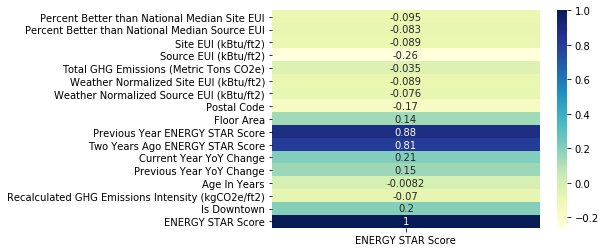

In [33]:
sns.heatmap(df[features_relevant + ['ENERGY STAR Score']].corr()[['ENERGY STAR Score']], cmap="YlGnBu", annot=True)

In [34]:
df[features_relevant].dtypes

Benchmark Status                                      object
Percent Better than National Median Site EUI         float64
Percent Better than National Median Source EUI       float64
Site EUI (kBtu/ft2)                                  float64
Source EUI (kBtu/ft2)                                float64
Total GHG Emissions (Metric Tons CO2e)               float64
Weather Normalized Site EUI (kBtu/ft2)               float64
Weather Normalized Source EUI (kBtu/ft2)             float64
Postal Code                                            int64
Floor Area                                             int64
Property Type                                         object
Property Type - Self Selected                         object
Previous Year ENERGY STAR Score                      float64
Two Years Ago ENERGY STAR Score                      float64
Current Year YoY Change                              float64
Previous Year YoY Change                             float64
Age In Years            

In [3]:
# dummify features 
property_dummies = pd.get_dummies(df['Property Type'])
benchmark_dummies = pd.get_dummies(df['Benchmark Status'])
df['Is Downtown'] = df['Is Downtown'].astype(int)

dummies_all = pd.concat([property_dummies, benchmark_dummies], axis=1)

df_dummies = pd.concat([df, dummies_all], axis=1)

In [35]:
lm_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

lm_data1 = lm_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                ], axis=1)

lm_data1 = lm_data1.dropna()

X_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_train = sm.add_constant(X_train)

est = sm.OLS(y_train, X_train).fit()
print(est.summary())

y_pred = est.predict(X_test)
print(r2_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.237e+26
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:35:04   Log-Likelihood:                 63091.
No. Observations:                2765   AIC:                        -1.261e+05
Df Residuals:                    2748   BIC:                        -1.260e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/opt/conda/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/conda/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [32]:
# take out multicollinear variables
lm_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

lm_data1 = lm_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                'Two Years Ago ENERGY STAR Score',
                'Weather Normalized Source EUI (kBtu/ft2)',
                'Percent Better than National Median Source EUI',
                'Current Year YoY Change',
                'Total GHG Emissions (Metric Tons CO2e)',
                'Source EUI (kBtu/ft2)', 
                ], axis=1)

lm_data1 = lm_data1.dropna()

X_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_train = sm.add_constant(X_train)

est = sm.OLS(y_train, X_train).fit()
print(est.summary())

y_pred = est.predict(X_test)
print(r2_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1762.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:34:02   Log-Likelihood:                -9973.2
No. Observations:                2765   AIC:                         1.997e+04
Df Residuals:                    2753   BIC:                         2.004e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/opt/conda/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/conda/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [61]:
# take out multicollinear variables
# and take out insignificant features
# take out dummies where there are no values in that col 

lm_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

lm_data1 = lm_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                'Two Years Ago ENERGY STAR Score',
                'Weather Normalized Source EUI (kBtu/ft2)',
                'Percent Better than National Median Source EUI',
                'Current Year YoY Change',
                'Total GHG Emissions (Metric Tons CO2e)',
                'Source EUI (kBtu/ft2)', 
                'Age In Years'
                ], axis=1)

lm_data1 = lm_data1.dropna()
nunique_df = lm_data1.apply(pd.Series.nunique)
cols_to_drop = nunique_df[nunique_df == 1].index
lm_data1 = lm_data1.drop(cols_to_drop, axis=1)

X_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

est = sm.OLS(y_train, X_train).fit()
print(est.summary())

y_pred = est.predict(X_test)
print(r2_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1939.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        06:55:08   Log-Likelihood:                -9973.3
No. Observations:                2765   AIC:                         1.997e+04
Df Residuals:                    2754   BIC:                         2.003e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [59]:
X_test.columns

Index(['Percent Better than National Median Site EUI', 'Site EUI (kBtu/ft2)',
       'Weather Normalized Site EUI (kBtu/ft2)', 'Floor Area',
       'Previous Year ENERGY STAR Score', 'Previous Year YoY Change',
       'Recalculated GHG Emissions Intensity (kgCO2e/ft2)', 'Is Downtown',
       'Complied', 'Data Not Verified', 'Violation - Insufficient Data'],
      dtype='object')

In [60]:
X_train.columns

Index(['const', 'Percent Better than National Median Site EUI',
       'Site EUI (kBtu/ft2)', 'Weather Normalized Site EUI (kBtu/ft2)',
       'Floor Area', 'Previous Year ENERGY STAR Score',
       'Previous Year YoY Change',
       'Recalculated GHG Emissions Intensity (kgCO2e/ft2)', 'Is Downtown',
       'Complied', 'Data Not Verified', 'Violation - Insufficient Data'],
      dtype='object')

## Random Forest

### With all relevant features, default hyperparameters

In [16]:
rf_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

rf_data1 = rf_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                ], axis=1)

rf_data1 = rf_data1.dropna()

X_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

regr = RandomForestRegressor()

regr.fit(X_train, y_train.values.ravel())
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

for (x, y) in zip(X_train.columns, regr.feature_importances_):
    print(x, round(y, 3))

0.9992659778605959
0.9795223362758568
Percent Better than National Median Site EUI 0.464
Percent Better than National Median Source EUI 0.526
Site EUI (kBtu/ft2) 0.001
Source EUI (kBtu/ft2) 0.001
Total GHG Emissions (Metric Tons CO2e) 0.0
Weather Normalized Site EUI (kBtu/ft2) 0.001
Weather Normalized Source EUI (kBtu/ft2) 0.001
Floor Area 0.0
Previous Year ENERGY STAR Score 0.002
Two Years Ago ENERGY STAR Score 0.0
Current Year YoY Change 0.001
Previous Year YoY Change 0.0
Age In Years 0.0
Recalculated GHG Emissions Intensity (kgCO2e/ft2) 0.001
Is Downtown 0.0
Commercial 0.0
Mixed Residential 0.0
Multifamily 0.0
Residential 0.0
Complied 0.0
Data Not Verified 0.0
Exempt 0.0
Violation - Insufficient Data 0.0


### With cross validation of the complexity parameter

#### Note that we are using only X_train, so data from prior to 2018

#### Looks like they are all pretty good, with accuracy 0.99

In [50]:
# With everything
rf_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

rf_data1 = rf_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                ], axis=1)

rf_data1 = rf_data1.dropna()

X_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

CPs = [0.0, 0.005, 0.01, 0.015, 0.02, 0.025]

kf = KFold(n_splits=5)

for cp in CPs:
    
    regr = RandomForestRegressor(ccp_alpha=cp)
    scores = []
    
    for k, (train_index, test_index) in enumerate(kf.split(X_train.values)):
        
        X_train_kfold, X_test_kfold = X_train.values[train_index], X_train.values[test_index]
        y_train_kfold, y_test_kfold = y_train.values[train_index], y_train.values[test_index] 
        
        regr.fit(X_train_kfold, y_train_kfold.ravel())
        
        scores.append(regr.score(X_test_kfold, y_test_kfold))
        
    print('Mean score for cp {}: {}'.format(cp, np.round(np.mean(scores), 2)))
    print()

Mean score for cp 0.0: 0.99

Mean score for cp 0.005: 0.99

Mean score for cp 0.01: 0.99

Mean score for cp 0.015: 0.99

Mean score for cp 0.02: 0.99

Mean score for cp 0.025: 0.99



### With cross validation of the max number of features to sample

In [52]:
# Starting at all the features, moving towards just 1

# With everything
rf_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

rf_data1 = rf_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                ], axis=1)

rf_data1 = rf_data1.dropna()

X_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

features_to_sample = np.arange(X_train.shape[1], 0, -1)

for f in features_to_sample:
    
    clf = RandomForestRegressor(max_features=f)
    scores = []
    
    for k, (train_index, test_index) in enumerate(kf.split(X_train.values)):
        
        X_train_kfold, X_test_kfold = X_train.values[train_index], X_train.values[test_index]
        y_train_kfold, y_test_kfold = y_train.values[train_index], y_train.values[test_index] 
        
        regr.fit(X_train_kfold, y_train_kfold.ravel())
        
        scores.append(regr.score(X_test_kfold, y_test_kfold))
        
    print('Mean score for max_features {}: {}'.format(f, np.round(np.mean(scores), 2)))
    print()

Mean score for max_features 23: 0.99

Mean score for max_features 22: 0.99

Mean score for max_features 21: 0.99

Mean score for max_features 20: 0.99

Mean score for max_features 19: 0.99

Mean score for max_features 18: 0.99

Mean score for max_features 17: 0.99

Mean score for max_features 16: 0.99

Mean score for max_features 15: 0.99

Mean score for max_features 14: 0.99

Mean score for max_features 13: 0.99

Mean score for max_features 12: 0.99

Mean score for max_features 11: 0.99

Mean score for max_features 10: 0.99

Mean score for max_features 9: 0.99

Mean score for max_features 8: 0.99

Mean score for max_features 7: 0.99

Mean score for max_features 6: 0.99

Mean score for max_features 5: 0.99

Mean score for max_features 4: 0.99

Mean score for max_features 3: 0.99

Mean score for max_features 2: 0.99

Mean score for max_features 1: 0.99



In [53]:
# Do the same thing on max depth (max depth of the trees)
# Starting at all the features, moving towards just 1

rf_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

rf_data1 = rf_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                ], axis=1)

rf_data1 = rf_data1.dropna()

X_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

max_depths = np.arange(1, 10)

print([x for x in X_train.columns])

for d in max_depths:
    
    clf = RandomForestRegressor(max_depth=d)
    scores = []
    
    for k, (train_index, test_index) in enumerate(kf.split(X_train.values)):
        
        X_train_kfold, X_test_kfold = X_train.values[train_index], X_train.values[test_index]
        y_train_kfold, y_test_kfold = y_train.values[train_index], y_train.values[test_index] 
        
        regr.fit(X_train_kfold, y_train_kfold.ravel())
        
        scores.append(regr.score(X_test_kfold, y_test_kfold))
        
    print('Mean score for max_depth {}: {}'.format(d, np.round(np.mean(scores), 2)))
    print()

['Percent Better than National Median Site EUI', 'Percent Better than National Median Source EUI', 'Site EUI (kBtu/ft2)', 'Source EUI (kBtu/ft2)', 'Total GHG Emissions (Metric Tons CO2e)', 'Weather Normalized Site EUI (kBtu/ft2)', 'Weather Normalized Source EUI (kBtu/ft2)', 'Floor Area', 'Previous Year ENERGY STAR Score', 'Two Years Ago ENERGY STAR Score', 'Current Year YoY Change', 'Previous Year YoY Change', 'Age In Years', 'Recalculated GHG Emissions Intensity (kgCO2e/ft2)', 'Is Downtown', 'Commercial', 'Mixed Residential', 'Multifamily', 'Residential', 'Complied', 'Data Not Verified', 'Exempt', 'Violation - Insufficient Data']
Mean score for max_depth 1: 0.99

Mean score for max_depth 2: 0.99

Mean score for max_depth 3: 0.99

Mean score for max_depth 4: 0.99

Mean score for max_depth 5: 0.99

Mean score for max_depth 6: 0.99

Mean score for max_depth 7: 0.99

Mean score for max_depth 8: 0.99

Mean score for max_depth 9: 0.99



# Suppose the building is new, and we must take out the previous 1 and 2 years' scores and YoY change, how do they models perform in this case?

## Linear Regression

In [38]:
# take out multicollinear variables
lm_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

lm_data1 = lm_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                'Two Years Ago ENERGY STAR Score',
                'Weather Normalized Source EUI (kBtu/ft2)',
                'Percent Better than National Median Source EUI',
                'Current Year YoY Change',
                'Total GHG Emissions (Metric Tons CO2e)',
                'Source EUI (kBtu/ft2)', 
                'Previous Year ENERGY STAR Score',
                'Previous Year YoY Change'
                ], axis=1)

lm_data1 = lm_data1.dropna()

X_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_train = sm.add_constant(X_train)

est = sm.OLS(y_train, X_train).fit()
print(est.summary())

y_pred = est.predict(X_test)
print(r2_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     122.5
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          1.20e-227
Time:                        06:06:57   Log-Likelihood:                -21348.
No. Observations:                4684   AIC:                         4.272e+04
Df Residuals:                    4673   BIC:                         4.279e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [ ]:
# Previous Year ENERGY STAR Score                       
# Two Years Ago ENERGY STAR Score                      
# Current Year YoY Change                               
# Previous Year YoY Change 

In [7]:
# No previous years' data
# Default hyperparameters

rf_data1 = df_dummies[features_relevant+ dummies_all.columns.to_list() + ['ENERGY STAR Score']]

rf_data1 = rf_data1.drop(['Benchmark Status', 
                'Postal Code', 
                'Property Type', 
                'Property Type - Self Selected', 
                'Previous Year ENERGY STAR Score',
                'Two Years Ago ENERGY STAR Score',
                'Current Year YoY Change',
                'Previous Year YoY Change'
                ], axis=1)

rf_data1 = rf_data1.dropna()

X_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_train = rf_data1[~rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis=1)
y_test = rf_data1[rf_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

regr = RandomForestRegressor()

regr.fit(X_train, y_train.values.ravel())
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

for (x, y) in zip(X_train.columns, regr.feature_importances_):
    print(x, round(y, 3))

0.9989187620805361
0.9745513961848253


In [15]:
for (x, y) in zip(X_train.columns, regr.feature_importances_):
    print(x, round(y, 3))

Percent Better than National Median Site EUI 0.444
Percent Better than National Median Source EUI 0.545
Site EUI (kBtu/ft2) 0.002
Source EUI (kBtu/ft2) 0.002
Total GHG Emissions (Metric Tons CO2e) 0.001
Weather Normalized Site EUI (kBtu/ft2) 0.002
Weather Normalized Source EUI (kBtu/ft2) 0.002
Floor Area 0.001
Age In Years 0.001
Recalculated GHG Emissions Intensity (kgCO2e/ft2) 0.001
Is Downtown 0.0
Commercial 0.0
Mixed Residential 0.0
Multifamily 0.0
Residential 0.0
Complied 0.0
Data Not Verified 0.0
Exempt 0.0
Violation - Insufficient Data 0.0


In [17]:
frame = { 'Feature': X_train.columns, 'Feature importance': regr.feature_importances_ }

In [22]:
pd.DataFrame(frame)

,Feature,Feature importance
0,Percent Better than National Median Site EUI,0.463618
1,Percent Better than National Median Source EUI,0.525884
2,Site EUI (kBtu/ft2),0.001293
3,Source EUI (kBtu/ft2),0.000923
4,Total GHG Emissions (Metric Tons CO2e),0.000491
5,Weather Normalized Site EUI (kBtu/ft2),0.001181
6,Weather Normalized Source EUI (kBtu/ft2),0.001027
7,Floor Area,0.000403
8,Previous Year ENERGY STAR Score,0.001688
9,Two Years Ago ENERGY STAR Score,0.000443
